### Socio-tech final project survey data analysis code - Arunprakash Nagarajan

#### Data that was processed in python and pie charts created in Excel can be found in the folder "Excel generated Pie charts"

In [ ]:
#importing required python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from IPython.display import display
pd.options.display.max_columns = None
stop_words = set(stopwords.words('english'))
%matplotlib inline

In [2]:
df = pd.read_csv('CUMTD Survey results- refined.csv')

### Analyzing main issues

In [3]:
is_un = df['What issues?'].unique()

In [4]:
df['What issues?'].unique()

array(['Usual Frequencies,Routes,Peak-hour crowd,Services over breaks',
       'Timing', 'Timing,Night services', 'Other', 'Timing,Routes',
       'Timing,Usual Frequencies,Night services',
       'Timing,Usual Frequencies,Routes,Services over breaks',
       'Usual Frequencies,Services over breaks',
       'Timing,Usual Frequencies,Services over breaks,Night services',
       'Services over breaks', 'Usual Frequencies,Routes', 'Timing,Other',
       'Routes',
       'Timing,Usual Frequencies,Peak-hour crowd,Services over breaks',
       'Timing,Routes,Peak-hour crowd,Services over breaks,Night services,Other',
       'Peak-hour crowd,Services over breaks,Night services',
       'Timing,Peak-hour crowd,Night services',
       'Timing,Services over breaks,Night services',
       'Peak-hour crowd,Night services', 'Timing,Services over breaks',
       'Timing,Routes,Peak-hour crowd,Services over breaks,Night services',
       'Timing,Peak-hour crowd,Other',
       'Services over breaks,Ni

In [5]:
issue_dict = {}
for issue in df['What issues?']:
    single_flag = False
    if ',' in issue:
        all_issues = issue.split(',')
    else:
        all_issues = issue
        single_flag = True
    if single_flag == False:
        for each_issue in all_issues:
            if each_issue in issue_dict.keys():
                issue_dict[each_issue]+=1
            else:
                issue_dict[each_issue]=1
    else:
        if issue in issue_dict.keys():
                issue_dict[issue]+=1
        else:
            issue_dict[issue]=1

In [6]:
issue_dict

{'Accessibility': 4,
 'Night services': 28,
 'Other': 12,
 'Peak-hour crowd': 20,
 'Routes': 30,
 'Services over breaks': 36,
 'Timing': 57,
 'Usual Frequencies': 26}

### Analyzing improvements

In [7]:
tt = df['Realistic Improvements- Open Text'].dropna(axis = 0)

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.extend(['bus'])
from nltk.stem import PorterStemmer
st = PorterStemmer()
def clean(a):
    a = a.apply(lambda x: " ".join(x.lower() for x in x.split())) #Converting to lower case
    a = a.str.replace("[^a-zA-Z#.]", " ") #Removing punctuation 
    a = a.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    return(a)

In [9]:
tt = clean(tt)

/usr/local/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


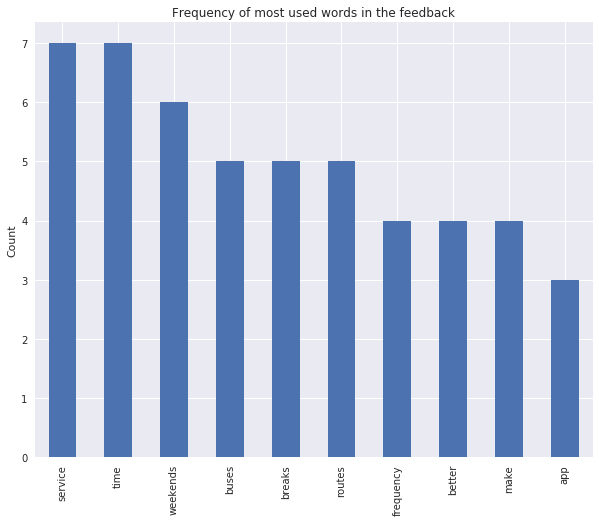

In [10]:
freq = pd.Series(' '.join(tt).split()).value_counts()[:10]
plt.figure(1,figsize=(10,8))
freq.plot(kind='bar')
plt.title('Frequency of most used words in the feedback')
plt.ylabel('Count')
plt.show()

/usr/local/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


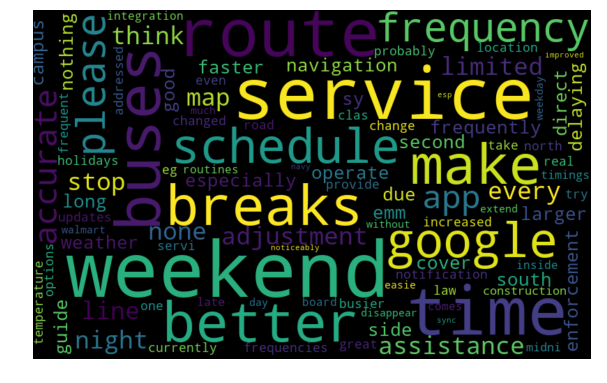

In [12]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='black').generate(tt.to_string())
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Overall Satisfaction

/usr/local/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


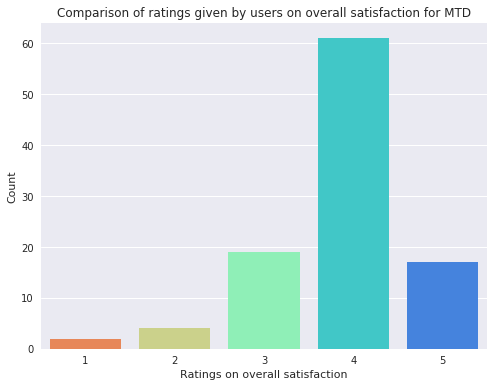

In [98]:
plt.figure(1,figsize=(8,6))
sns.countplot(x="Overall Satisfaction", data=df,palette="rainbow_r")
plt.title("Comparison of ratings given by users on overall satisfaction for MTD")
plt.xlabel('Ratings on overall satisfaction')
plt.ylabel('Count')

### App satisfaction

/usr/local/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


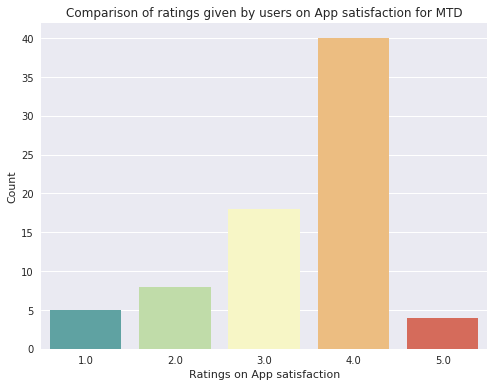

In [119]:
plt.figure(1,figsize=(8,6))
sns.countplot(x="App satisfaction", data=df,palette="Spectral_r")
plt.title("Comparison of ratings given by users on App satisfaction for MTD")
plt.xlabel('Ratings on App satisfaction')
plt.ylabel('Count')

### Usage frequency

/usr/local/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


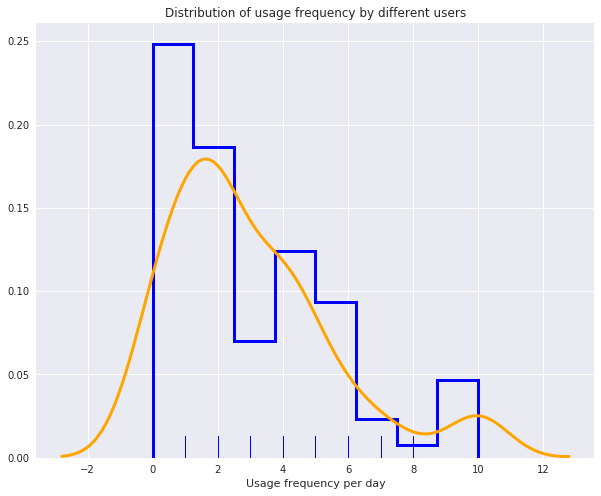

In [64]:
plt.figure(1,figsize=(10,8))
sns.distplot(df['Usage frequency per day'],rug=True, rug_kws={"color": "b"},
                 kde_kws={"color": "orange", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "b"})
plt.title('Distribution of usage frequency by different users')

### Different user categories

/usr/local/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


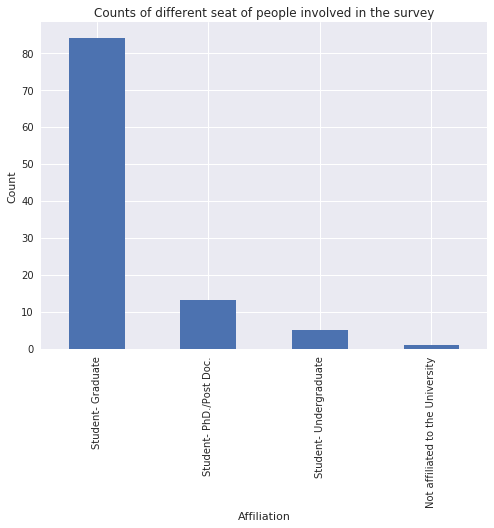

In [97]:
plt.figure(1,figsize=(8,6))
pd.value_counts(df['Affiliation']).plot.bar()
plt.title('Counts of different seat of people involved in the survey')
plt.xlabel('Affiliation')
plt.ylabel('Count')


### Sentiment Analysis 

In [164]:
a = df['Realistic Improvements- Open Text'].dropna(axis=0)
a = a.to_frame()

In [162]:
a['Realistic Improvements- Open Text'] = a['Realistic Improvements- Open Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
a['Realistic Improvements- Open Text'] = a['Realistic Improvements- Open Text'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
#stop = stopwords.words('english')
#stop.extend(('bus'))
a['Realistic Improvements- Open Text'] = a['Realistic Improvements- Open Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
from textblob import Word
a['Realistic Improvements- Open Text'] = a['Realistic Improvements- Open Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [166]:
a['sentiment_pred'] = a['Realistic Improvements- Open Text'].apply(lambda x: TextBlob(x).sentiment[0])
a.head()

,Realistic Improvements- Open Text,sentiment_pred
1,The stop that the bus being at currently,0.0
2,Route change notification,0.0
3,Emm....,0.0
5,The schedule app can be improved.,0.0
8,Good navigation assistance and integration wit...,0.7


In [180]:
a[a['sentiment_pred']>0.1]

,Realistic Improvements- Open Text,sentiment_pred
8,Good navigation assistance and integration wit...,0.700000
15,Probably make the bus more frequent during the...,0.375000
31,Try to cover more routes,0.500000
34,Better service over weekends,0.500000
35,more night service,0.500000
36,Better service on weekends,0.500000
37,"Limited weekend service to be addressed, bette...",0.142857
38,More of the larger buses and buses on the week...,0.250000
41,None. I think it's great!,1.000000
42,More frequency during weekends,0.500000


In [181]:
a[a['sentiment_pred']<=0.1]

,Realistic Improvements- Open Text,sentiment_pred
1,The stop that the bus being at currently,0.000000
2,Route change notification,0.000000
3,Emm....,0.000000
5,The schedule app can be improved.,0.000000
9,Frequency during breaks,0.000000
11,None,0.000000
12,Bus service during holidays and weekends,0.000000
16,Updates real time location of the bus every se...,0.100000
19,I think we could make some bus routes that wil...,0.059259
22,Don't make 22 limited on weekends.,-0.071429
